## Grupo 4 - Laboratorio 1 (Python)

### Integrantes:
Katiuska Olivera Quevedo (20172533) <br/> 
Rosemery Fernandez Sanchez (20172635) <br/> 
Aliro Cabrera Florez (20152034) <br/> 
Jose Uscamayta Quispe (20195674) <br/> 

### Data analysis

In [2]:
import pandas as pd
import numpy as np
import pyreadr
import math
import os
import csv

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#rdata_read = pyreadr.read_r("../data/wage2015_subsample_inference.Rdata")
#data = rdata_read['data']
#data.shape

In [6]:
os.chdir("C:/Users/ok235/OneDrive/Documentos/GitHub/ECO224/Labs/data")
data=pd.read_csv('wage2015_subsample_inference.csv',encoding ='latin1',delimiter=',')

In [7]:
data.head()

,Unnamed: 0,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
0,10,9.615385,2.263364,1,0,0,0,1,0,0,...,0,1,7.0,0.49,0.343,0.2401,3600.0,11,8370.0,18
1,12,48.076923,3.872802,0,0,0,0,1,0,0,...,0,1,31.0,9.61,29.791,92.3521,3050.0,10,5070.0,9
2,15,11.057692,2.403126,0,0,1,0,0,0,0,...,0,1,18.0,3.24,5.832,10.4976,6260.0,19,770.0,4
3,18,13.942308,2.634928,1,0,0,0,0,1,0,...,0,1,25.0,6.25,15.625,39.0625,420.0,1,6990.0,12
4,19,28.846154,3.361977,1,0,0,0,1,0,0,...,0,1,22.0,4.84,10.648,23.4256,2015.0,6,9470.0,22


In [9]:
data['ce'] = data[['scl','clg']].sum(axis=1)

In [11]:
Z = data[ data[ 'ce' ] == 1 ]

In [13]:
Z1 = Z[ ["lwage","sex","scl","clg","ne","mw","so","we","exp1"] ]

In [14]:
Z1.head()


,lwage,sex,scl,clg,ne,mw,so,we,exp1
0,2.263364,1,0,1,1,0,0,0,7.0
1,3.872802,0,0,1,1,0,0,0,31.0
4,3.361977,1,0,1,1,0,0,0,22.0
5,2.462215,1,0,1,1,0,0,0,1.0
9,2.956512,1,0,1,1,0,0,0,4.0


In [29]:
data_female = Z1[Z1[ 'sex' ] == 1 ]
Z_female = data_female[ ["lwage","sex","scl","clg","ne","mw","so","we","exp1"] ]

data_male = Z1[ Z1[ 'sex' ] == 0 ]
Z_male = data_male[ [ "lwage","sex","scl","clg","ne","mw","so","we","exp1" ] ]

In [30]:
table = np.zeros( (9, 3) )
table[:, 0] = Z1.mean().values
table[:, 1] = Z_male.mean().values
table[:, 2] = Z_female.mean().values
table_pandas = pd.DataFrame( table, columns = [ 'All', 'Men', 'Women'])
table_pandas.index = ["Log Wage","Sex","Some College","Gollage Graduate", "Northeast","Midwest","South","West","Experience"]
table_html = table_pandas.to_html()

table_pandas

,All,Men,Women
Log Wage,3.000022,3.038412,2.956904
Sex,0.470991,0.000000,1.000000
Some College,0.466754,0.481824,0.449827
Gollage Graduate,0.533246,0.518176,0.550173
Northeast,0.226532,0.219347,0.234602
Midwest,0.265971,0.261245,0.271280
South,0.285854,0.290819,0.280277
West,0.221643,0.228589,0.213841
Experience,12.700945,12.433148,13.001730


In [31]:
print( table_html )

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>All</th>
      <th>Men</th>
      <th>Women</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Log Wage</th>
      <td>3.000022</td>
      <td>3.038412</td>
      <td>2.956904</td>
    </tr>
    <tr>
      <th>Sex</th>
      <td>0.470991</td>
      <td>0.000000</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>Some College</th>
      <td>0.466754</td>
      <td>0.481824</td>
      <td>0.449827</td>
    </tr>
    <tr>
      <th>Gollage Graduate</th>
      <td>0.533246</td>
      <td>0.518176</td>
      <td>0.550173</td>
    </tr>
    <tr>
      <th>Northeast</th>
      <td>0.226532</td>
      <td>0.219347</td>
      <td>0.234602</td>
    </tr>
    <tr>
      <th>Midwest</th>
      <td>0.265971</td>
      <td>0.261245</td>
      <td>0.271280</td>
    </tr>
    <tr>
      <th>South</th>
      <td>0.285854</td>
      <td>0.290819</td>
      <td>0.280277</td>
    </tr>
  

In [32]:
data_female['lwage'].mean() - data_male['lwage'].mean()

-0.08150855508736754

In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [36]:
nocontrol_model = smf.ols( formula = 'lwage ~ sex', data = Z1 )
nocontrol_est = nocontrol_model.fit().summary2().tables[1]['Coef.']['sex']
HCV_coefs = nocontrol_model.fit().cov_HC0
nocontrol_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

# print unconditional effect of gender and the corresponding standard error
print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding robust standard error is {nocontrol_se}' )

The estimated gender coefficient is -0.08150855508735964 and the corresponding robust standard error is 0.01957964776777236


## Ols regression with controls

In [38]:
flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(scl+clg+occ2+ind2+mw+so+we)'

# The smf api replicates R script when it transform data
control_model = smf.ols( formula = flex, data = Z )
control_est = control_model.fit().summary2().tables[1]['Coef.']['sex']

print(control_model.fit().summary2().tables[1])
print( f"Coefficient for OLS with controls {control_est}" )

HCV_coefs = control_model.fit().cov_HC0
control_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

              Coef.  Std.Err.          t         P>|t|    [0.025    0.975]
Intercept  2.224896  0.103735  21.447850  3.974133e-95  2.021497  2.428294
sex       -0.086028  0.018397  -4.676215  3.049873e-06 -0.122100 -0.049956
exp1      -0.002532  0.037647  -0.067268  9.463726e-01 -0.076348  0.071283
exp2       0.071014  0.396283   0.179199  8.577933e-01 -0.705997  0.848024
exp3      -0.015324  0.152622  -0.100408  9.200269e-01 -0.314577  0.283928
exp4       0.000666  0.019236   0.034600  9.724010e-01 -0.037052  0.038383
scl        0.991990  0.092034  10.778531  1.311328e-26  0.811535  1.172445
clg        1.232905  0.064051  19.248920  5.405195e-78  1.107318  1.358493
occ2      -0.028732  0.006082  -4.724465  2.412173e-06 -0.040656 -0.016808
ind2      -0.016900  0.007942  -2.127865  3.342877e-02 -0.032473 -0.001327
mw         0.180632  0.107514   1.680084  9.304395e-02 -0.030175  0.391439
so        -0.003352  0.103945  -0.032246  9.742781e-01 -0.207162  0.200459
we         0.088265  0.11

## Partialling-Out using ols (Frisch-Waugh-Lovell Theorem)

\begin{align}
\log(Y) &=\beta_1 D  + \beta_2' W + \epsilon.
\end{align}

$Y$ = log wage <br/>
$D$ = gender

Next, we run an ols regression of $W$ on $(Y,D)$ to find the standard error of both variables. 
Then we run an ols regression of both standard error. This will give us the coefficient ($beta$) of the $Y$. 



In [39]:
# models
# model for Y
flex_y = 'lwage ~  (exp1+exp2+exp3+exp4)*(scl+clg+occ2+ind2+mw+so+we)'
# model for D
flex_d = 'sex ~ (exp1+exp2+exp3+exp4)*(scl+clg+occ2+ind2+mw+so+we)' 

# partialling-out the linear effect of W from Y
t_Y = smf.ols( formula = flex_y , data = Z ).fit().resid

# partialling-out the linear effect of W from D
t_D = smf.ols( formula = flex_d , data = Z ).fit().resid

data_res = pd.DataFrame( np.vstack(( t_Y.values , t_D.values )).T , columns = [ 't_Y', 't_D' ] )
# regression of Y on D after partialling-out the effect of W
partial_fit =  smf.ols( formula = 't_Y ~ t_D' , data = data_res ).fit()
partial_est = partial_fit.summary2().tables[1]['Coef.']['t_D']

print("Coefficient for D via partialling-out", partial_est)

# standard error
HCV_coefs = partial_fit.cov_HC0
partial_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

# confidence interval
partial_fit.conf_int( alpha=0.05 ).iloc[1, :]

Coefficient for D via partialling-out -0.08602831317186574


0   -0.121899
1   -0.050157
Name: t_D, dtype: float64

## Gráfico 

### Experiencia 1

In [47]:
Z2 = data[ data[ 'scl' ] == 1 ]
Z2.head()

,Unnamed: 0,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2,ce
12,84,12.019231,2.486508,1,0,0,1,0,0,0,...,1,5.5,0.3025,0.166375,0.091506,3600.0,11,8270.0,18,1
13,89,13.461538,2.599837,1,0,0,1,0,0,0,...,1,20.5,4.2025,8.615125,17.661006,3645.0,11,8190.0,18,1
17,119,8.653846,2.158004,0,0,0,1,0,0,0,...,1,3.5,0.1225,0.042875,0.015006,7410.0,20,570.0,3,1
20,135,10.683761,2.368725,1,0,0,1,0,0,0,...,1,6.5,0.4225,0.274625,0.178506,4300.0,15,8590.0,19,1
21,144,11.538462,2.445686,1,0,0,1,0,0,0,...,1,8.5,0.7225,0.614125,0.522006,3600.0,11,8190.0,18,1


In [48]:
nocontrol_model = smf.ols( formula = 'lwage ~ exp1', data = Z2 )
coef11 = nocontrol_model.fit().summary2().tables[1]['Coef.']['exp1']
HCV_coefs = nocontrol_model.fit().cov_HC0
error11 = np.power( HCV_coefs.diagonal() , 0.5)[1]

# print unconditional effect of gender and the corresponding standard error
print( f'The estimated college coefficient is {coef11} and the corresponding robust standard error is {error11}' )


The estimated college coefficient is 0.010447835355606689 and the corresponding robust standard error is 0.0012767199673124616


In [49]:
Z3 = data[ data[ 'clg' ] == 1 ]
Z3.head()

,Unnamed: 0,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2,ce
0,10,9.615385,2.263364,1,0,0,0,1,0,0,...,1,7.0,0.49,0.343,0.2401,3600.0,11,8370.0,18,1
1,12,48.076923,3.872802,0,0,0,0,1,0,0,...,1,31.0,9.61,29.791,92.3521,3050.0,10,5070.0,9,1
4,19,28.846154,3.361977,1,0,0,0,1,0,0,...,1,22.0,4.84,10.648,23.4256,2015.0,6,9470.0,22,1
5,30,11.730769,2.462215,1,0,0,0,1,0,0,...,1,1.0,0.01,0.001,0.0001,1650.0,5,7460.0,14,1
9,71,19.230769,2.956512,1,0,0,0,1,0,0,...,1,4.0,0.16,0.064,0.0256,3255.0,10,8190.0,18,1


In [50]:
nocontrol_model = smf.ols( formula = 'lwage ~ exp1', data = Z3 )
coef22 = nocontrol_model.fit().summary2().tables[1]['Coef.']['exp1']
HCV_coefs = nocontrol_model.fit().cov_HC0
error22 = np.power( HCV_coefs.diagonal() , 0.5)[1]

# print unconditional effect of gender and the corresponding standard error
print( f'The estimated college coefficient is {coef22} and the corresponding robust standard error is {error22}' )

The estimated college coefficient is 0.007326840748510011 and the corresponding robust standard error is 0.0013691441196254477


In [54]:
Y1=Z2["exp1"]*coef11+error11


In [55]:
Y2=Z3["exp1"]*coef22+error22


In [56]:
import seaborn as sns 
sns.set_theme(color_codes=True)


<AxesSubplot:xlabel='exp1', ylabel='lwage'>

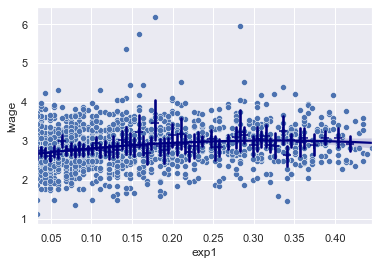

In [60]:
x=Y1
y=Z2["lwage"]
sns.scatterplot(x=x,y=y)
sns.regplot(x=x,y=y,order=2,color='navy',marker="+",x_bins=100)

<AxesSubplot:xlabel='exp1', ylabel='lwage'>

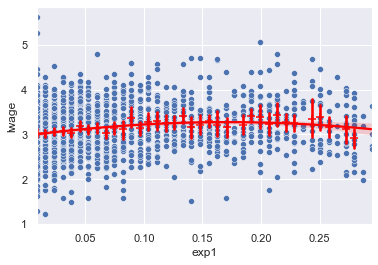

In [76]:
x=Y2
y=Z3["lwage"]
sns.scatterplot(x=x,y=y)
sns.regplot(x=x,y=y,order=2,color='red',marker="+",x_bins=100)

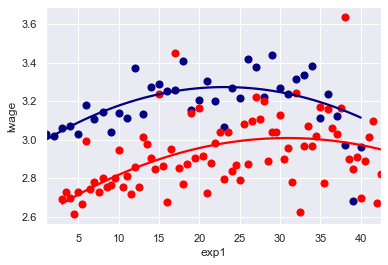

In [77]:
sns.regplot(x=data[data['clg']==1].exp1,y=data[data['clg']==1].lwage,scatter=True,order=2,x_jitter=.001,x_estimator=np.mean,fit_reg=True,ci=None, color="navy")
sns.regplot(x=data[data['scl']==1].exp1,y=data[data['scl']==1].lwage,scatter=True,order=2,x_jitter=.001,x_estimator=np.mean,fit_reg=True,ci=None, color="red")
xlabel='experiencia'
ylabel='lwage'

### Experiencia al cuadrado

In [64]:
nocontrol_model = smf.ols( formula = 'lwage ~ exp2', data = Z2 )
coef112 = nocontrol_model.fit().summary2().tables[1]['Coef.']['exp2']
HCV_coefs = nocontrol_model.fit().cov_HC0
error112 = np.power( HCV_coefs.diagonal() , 0.5)[1]

# print unconditional effect of gender and the corresponding standard error
print( f'The estimated college coefficient is {coef112} and the corresponding robust standard error is {error112}' )

The estimated college coefficient is 0.023258935898886134 and the corresponding robust standard error is 0.00325779784579702


In [65]:
Y12=Z2["exp2"]*coef112+error112
Y12.head()

12    0.010294
13    0.101003
17    0.006107
20    0.013085
21    0.020062
Name: exp2, dtype: float64

In [66]:
nocontrol_model = smf.ols( formula = 'lwage ~ exp2', data = Z3 )
coef222 = nocontrol_model.fit().summary2().tables[1]['Coef.']['exp2']
HCV_coefs = nocontrol_model.fit().cov_HC0
error222 = np.power( HCV_coefs.diagonal() , 0.5)[1]

# print unconditional effect of gender and the corresponding standard error
print( f'The estimated college coefficient is {coef222} and the corresponding robust standard error is {error222}' )

The estimated college coefficient is 0.015722687332315806 and the corresponding robust standard error is 0.004112851364307927


In [67]:
Y22=Z3["exp2"]*coef222+error222
Y22.head()

0    0.011817
1    0.155208
4    0.080211
5    0.004270
9    0.006628
Name: exp2, dtype: float64

<AxesSubplot:xlabel='exp2', ylabel='lwage'>

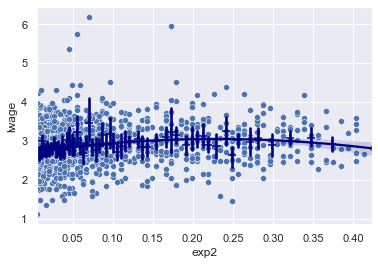

In [74]:
x=Y12
y=Z2["lwage"]
sns.scatterplot(x=x,y=y)
sns.regplot(x=x,y=y,order=2,color='navy',marker="+",x_bins=100)

<AxesSubplot:xlabel='exp2', ylabel='lwage'>

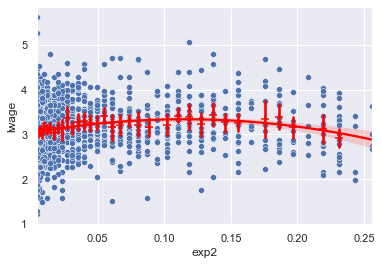

In [73]:
x=Y22
y=Z3["lwage"]
sns.scatterplot(x=x,y=y)
sns.regplot(x=x,y=y,order=2,color='red',marker="+",x_bins=100)

<AxesSubplot:xlabel='exp2', ylabel='lwage'>

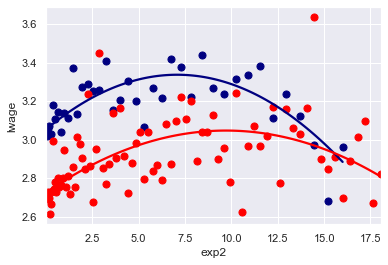

In [75]:
sns.regplot(x=data[data['clg']==1].exp2,y=data[data['clg']==1].lwage,scatter=True,order=2,x_jitter=.001,x_estimator=np.mean,fit_reg=True,ci=None,color="navy")
sns.regplot(x=data[data['scl']==1].exp2,y=data[data['scl']==1].lwage,scatter=True,order=2,x_jitter=.001,x_estimator=np.mean,fit_reg=True,ci=None,color="red")

### Experiencia cuadratica


In [78]:
nocontrol_model = smf.ols( formula = 'lwage ~ exp4', data = Z2 )
coef114 = nocontrol_model.fit().summary2().tables[1]['Coef.']['exp4']
HCV_coefs = nocontrol_model.fit().cov_HC0
error114 = np.power( HCV_coefs.diagonal() , 0.5)[1]

# print unconditional effect of gender and the corresponding standard error
print( f'The estimated college coefficient is {coef114} and the corresponding robust standard error is {error114}' )

The estimated college coefficient is 0.001298724382599092 and the corresponding robust standard error is 0.00024095697965401754


In [79]:
Y14=Z2["exp4"]*coef114+error114
Y14.head()

12    0.000360
13    0.023178
17    0.000260
20    0.000473
21    0.000919
Name: exp4, dtype: float64

In [80]:
nocontrol_model = smf.ols( formula = 'lwage ~ exp4', data = Z3 )
coef24 = nocontrol_model.fit().summary2().tables[1]['Coef.']['exp4']
HCV_coefs = nocontrol_model.fit().cov_HC0
error24 = np.power( HCV_coefs.diagonal() , 0.5)[1]

# print unconditional effect of gender and the corresponding standard error
print( f'The estimated college coefficient is {coef24} and the corresponding robust standard error is {error24}' )

The estimated college coefficient is 0.0006105278044913584 and the corresponding robust standard error is 0.00034691971577778557


In [81]:
Y24=Z3["exp4"]*coef24+error24
Y24.head()

0    0.000494
1    0.056730
4    0.014649
5    0.000347
9    0.000363
Name: exp4, dtype: float64

<AxesSubplot:xlabel='exp4', ylabel='lwage'>

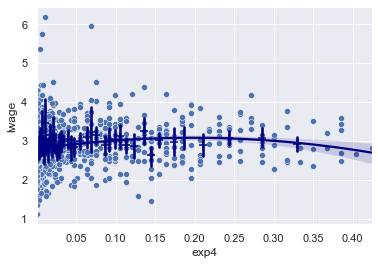

In [82]:
x=Y14
y=Z2["lwage"]
sns.scatterplot(x=x,y=y)
sns.regplot(x=x,y=y,order=2,color='navy',marker="+",x_bins=100)

<AxesSubplot:xlabel='exp4', ylabel='lwage'>

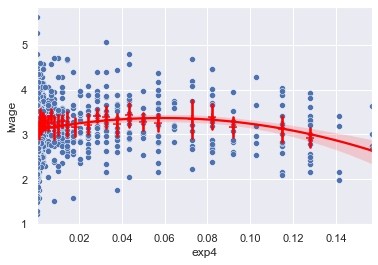

In [83]:
x=Y24
y=Z3["lwage"]
sns.scatterplot(x=x,y=y)
sns.regplot(x=x,y=y,order=2,color='red',marker="+",x_bins=100)

<AxesSubplot:xlabel='exp4', ylabel='lwage'>

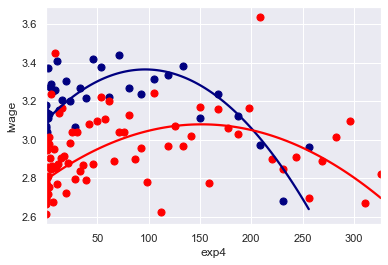

In [84]:
sns.regplot(x=data[data['clg']==1].exp4,y=data[data['clg']==1].lwage,scatter=True,order=2,x_jitter=.001,x_estimator=np.mean,fit_reg=True,ci=None,color="navy")
sns.regplot(x=data[data['scl']==1].exp4,y=data[data['scl']==1].lwage,scatter=True,order=2,x_jitter=.001,x_estimator=np.mean,fit_reg=True,ci=None,color="red")

#### When the exponent of the experience variable gets larger (in this case it is raised to the quadratic), it fits the data better. 